# Project 2: Wrangle and Analyze Data

## Data Gathering
Below, I gathered all the 3 parts of the required Data set this project and loaded them in the appropriate Data Frames using three different methods.

### Method One: Directly Download the *WeRateDogs Twitter archive data* called twitter_archive_enhanced.csv from the file provided


In [1]:
#importing all the libraries I will require in the project
import pandas as pd
import numpy as np

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
#reading the twitter-archive-enhanced CSV file data into the DataFrame
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')   

###  Method Two: Using the Requests library to download the tweet image prediction called *image_predictions.tsv*

In [8]:
#importing the requests library
import requests

In [209]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [210]:
#writing the content of the url  into a tsv file
open('image-predictions.tsv', 'wb').write(response.content)

335079

In [3]:
# Reading the image predictions TSV file into a DataFrame
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

### Method Three: Using the Tweepy library to query additional data via the Twitter API called *tweet_json.txt*

In [ ]:
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

#### I intend to collect the following Data:
* tweet_id
* retweet_count
* Favorite_count
* followers_count

In [4]:
tweet_json = []

# read in the json file line by line into a list
with open("tweet_json.txt") as file:
    for line in file:
        tweet_json.append(json.loads(line))

In [15]:
# Testing to see if the list contains the objects
tweet_json[1]

{'created_at': 'Tue Aug 01 00:17:27 +0000 2017',
 'id': 892177421306343426,
 'id_str': '892177421306343426',
 'full_text': "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",
 'truncated': False,
 'display_text_range': [0, 138],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892177413194625024,
    'id_str': '892177413194625024',
    'indices': [139, 162],
    'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
    'url': 'https://t.co/0Xxu71qeIV',
    'display_url': 'pic.twitter.com/0Xxu71qeIV',
    'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w

In [5]:
# create a data frame containing the relevant api data
data_from_api = pd.DataFrame({'tweet_id': [i["id_str"] for i in tweet_json], 
     'retweet_count': [i["retweet_count"] for i in tweet_json], 
     'favorite_count': [i["favorite_count"] for i in tweet_json], 
     'followers_count': [i["user"]["followers_count"] for i in tweet_json]})

## Assessing Data

In [17]:
# Display the first 5 rows of the twitter-archive-enhanced DataFrame using the head method
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [18]:
# Display the first 5 rows of the image predictions DataFrame
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
# Display the first 5 rows of the additional data from the twitter API DataFrame
data_from_api.head()

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


#### Accessing the Data Sets for Quality issues:


#### Methods: Visual Assessment and Programmatic Assessment

In [6]:
# Examining the data sets for missing data
twitter_archive_enhanced.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [7]:
# Examining image_predictions data set for missing values
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [8]:
# Examining data_from_api for missing values
data_from_api.isnull().sum()

tweet_id           0
retweet_count      0
favorite_count     0
followers_count    0
dtype: int64

In [9]:
# Examining the twitter_archive_enhanced data set for duplicate data
twitter_archive_enhanced.duplicated().sum()

0

In [10]:
# Examining the image_predictions data set for duplicated data
image_predictions.duplicated().sum()

0

In [11]:
# Examining the data_from_api data set for duplicated data
data_from_api.duplicated().sum()

0

In [12]:
twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
#Examining the twitter_archive_enhanced data set programmtically
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
#Examining the image_predictions data set programmtically
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
#Examining the data_from_api data set programmtically
data_from_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2354 non-null   object
 1   retweet_count    2354 non-null   int64 
 2   favorite_count   2354 non-null   int64 
 3   followers_count  2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


#### Quality Issues Identified from both Visual and Programmatic Assesments:

**`twitter_archive_enhanced`:**

- data set contains non-original tweets and also tweets without images
- Name column in the twitter archive enhanced contains false names like "a"
- Missing Data in many columns(in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id_id,etweeted_status_user_id, retweeted_status_timestamp)
- some columns are wrong data type(Timestamp type is & tweet_id).
- The rows which have a NaN value of expanded_url are just comments with no actual image.
- dog stages not always detected correctly

**`image_predictions`:**
- False predictions, predictions contain values other than dog animals.
- Dog names are badly formatted

**`twitter_archive_enhanced & image_predictions`:**
- Table column names need to be edited to indicated description. 


#### Tidiness Issues Identified from both Visaul and Programmatic Assesments:
* Dog stages should not be placed in seperate columns
* join the tables at the end

## Cleaning Data

#### Making a copy of the original data before cleaning so as to avoid altering the content of the original data

In [17]:
twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()

In [18]:
image_predictions_clean = image_predictions.copy()

In [19]:
data_from_api_clean = data_from_api.copy()

In [20]:
twitter_archive_enhanced_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [85]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [86]:
data_from_api_clean.head()

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


### <font color ="red">Resolving Quality Issues:</font>

### Quality issue 1: data sets contain non-original tweets and also tweets without images

**`twitter_archive_enhanced`**

#### Define
Removing all retweets and tweets without images from twitter_archive_enhanced

#### Code 

In [21]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.retweeted_status_id.isnull()]

#### Test

In [22]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

**`data_from_api`**

##### Define

Perform a left Join of twitter_archive_enhanced_clean dataset to data_from_api_clean, to ensure that it does not contain retweets and tweets without images.

##### Code

In [23]:
twitter_archive_enhanced_clean.tweet_id = twitter_archive_enhanced_clean.tweet_id.astype('str')
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.merge(data_from_api_clean, on="tweet_id", how="left")

##### Test 

In [24]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

### Quality Issue 2: Name column in the twitter archive enhanced contains false names like "a"

#### Define
Change lowercase names to None as they are wrong.

#### Code

In [25]:
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.name.str.islower(),'name'] = None
twitter_archive_enhanced_clean.name.replace(regex=r'None', value= np.nan, inplace = True)

#### Test

In [26]:
twitter_archive_enhanced_clean.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,followers_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,8853,39467,3200889
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,6514,33819,3200889
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,4328,25461,3200889
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,8964,42908,3200889
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,9774,41048,3200889
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,None,None,None,None,3261,20562,3200889
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,2158,12041,3200889
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,None,None,None,None,16716,56848,3200889
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,4429,28226,3200889
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,7711,32467,3200889


In [27]:
twitter_archive_enhanced_clean.name.value_counts()

Charlie       11
Lucy          11
Cooper        10
Oliver        10
Penny          9
              ..
Shiloh         1
Gustav         1
Arlen          1
Lenox          1
Christoper     1
Name: name, Length: 930, dtype: int64

### Quality Issue 3:  Missing Data in some columns

###  <font color ="Green">- Missing Data in **in_reply_to_status_id column** from twitter_archive_enhanced dataset</font>

In [28]:
# the code below shows that this entire column has 2278 null entries
twitter_archive_enhanced_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,followers_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,8853,39467,3200889
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,6514,33819,3200889
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,4328,25461,3200889
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,8964,42908,3200889
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,9774,41048,3200889


#### Define

Drop the column with missing data

#### Code

In [29]:
del twitter_archive_enhanced_clean['in_reply_to_status_id']

#### Test

In [30]:
twitter_archive_enhanced_clean.head()

,tweet_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,followers_count
0,892420643555336193,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,8853,39467,3200889
1,892177421306343426,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,6514,33819,3200889
2,891815181378084864,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,4328,25461,3200889
3,891689557279858688,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,8964,42908,3200889
4,891327558926688256,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,9774,41048,3200889


### -<font color ="Green"> Missing Data in *in_reply_to_user_id column* from twitter_archive_enhanced dataset </font>

In [32]:
twitter_archive_enhanced_clean.in_reply_to_user_id.isnull().sum()

2097

#### Define

Drop the column with missing data

#### Code

In [33]:
del twitter_archive_enhanced_clean['in_reply_to_user_id']

#### Test

In [35]:
twitter_archive_enhanced_clean.head(20)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,followers_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,8853,39467,3200889
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,6514,33819,3200889
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,4328,25461,3200889
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,8964,42908,3200889
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,9774,41048,3200889
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,None,None,None,None,3261,20562,3200889
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,2158,12041,3200889
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,None,None,None,None,16716,56848,3200889
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,4429,28226,3200889
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,7711,32467,3200889


### -<font color ="Green"> Missing Data in *retweeted_status_id  column* from twitter_archive_enhanced dataset </font>

In [36]:
twitter_archive_enhanced_clean.retweeted_status_id.isnull().sum()

2175

#### Define

Drop the column with missing data

#### Code

In [37]:
del twitter_archive_enhanced_clean['retweeted_status_id']

#### Test

In [38]:
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,source,text,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,followers_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,8853,39467,3200889
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,6514,33819,3200889
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,4328,25461,3200889
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,8964,42908,3200889
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,9774,41048,3200889


### -<font color ="Green">Missing Data in *retweeted_status_id  column* , *retweeted_status_user_id*, *retweeted_status_timestamp* from twitter_archive_enhanced dataset </font>

#### Define

Drop all multiple columns with null data entries

#### Code

In [39]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(['retweeted_status_user_id','retweeted_status_timestamp','retweeted_status_user_id'], axis = 1)

#### Test

In [40]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   object
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                1391 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
 12  retweet_count       2175 non-null   int64 
 13  favorite_count      2175 non-null   int64 
 14  followers_count     2175 non-null   int64 
dtypes: int64(5), object(10)
memory usage: 271.9+ KB


### Quality Issue 3: some columns are wrong data type

### -<font color ="Green">tweet_id column in the twitter_archive_enhanced data set and image_predictions data set are of the integer data type instead of the object data type</font>

#### Define

Convert the data types of the *tweet_id* column in both twitter_archive_enhanced data set and image_predictions data sets from integer to object/string data type

#### Code / Test

In [41]:
# twitter_archive_enhanced dataset
twitter_archive_enhanced['tweet_id'].astype('object')

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 2356, dtype: object

In [42]:
#image_predictions dataset
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype('str')
#image_predictions_clean['tweet_id'].astype('object')
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


###  <font color ="Green">- timestamp column in twitter_archive_enhanced data set is of the object data type instead of DateTime object data type</font>

#### Define

Change the Data type of the timestamp column to the appropriate data type which is 'datetime64'

#### Code / Test

In [43]:
twitter_archive_enhanced['timestamp'].astype('datetime64')

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
               ...        
2351   2015-11-16 00:24:50
2352   2015-11-16 00:04:52
2353   2015-11-15 23:21:54
2354   2015-11-15 23:05:30
2355   2015-11-15 22:32:08
Name: timestamp, Length: 2356, dtype: datetime64[ns]

### Quality issue 4: The rows which have a NaN value of expanded_url are just comments with no actual image.

#### Define

drop rows which have a NaN value of expanded_urls

#### Code

In [44]:
twitter_archive_enhanced_clean.dropna(subset = ['expanded_urls'], inplace = True)

#### Test

In [45]:
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.expanded_urls.isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,followers_count


In [46]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2174
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2117 non-null   object
 1   timestamp           2117 non-null   object
 2   source              2117 non-null   object
 3   text                2117 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2117 non-null   int64 
 6   rating_denominator  2117 non-null   int64 
 7   name                1391 non-null   object
 8   doggo               2117 non-null   object
 9   floofer             2117 non-null   object
 10  pupper              2117 non-null   object
 11  puppo               2117 non-null   object
 12  retweet_count       2117 non-null   int64 
 13  favorite_count      2117 non-null   int64 
 14  followers_count     2117 non-null   int64 
dtypes: int64(5), object(10)
memory usage: 264.6+ KB


### Quality issue 7: False predictions, predictions contain values other than dog animals

#### Define

drop each false row prediction

#### Code

In [47]:
false_predictions = ~((image_predictions_clean.p1_dog) | (image_predictions_clean.p2_dog) | (image_predictions_clean.p3_dog))
false_predictions_dog = image_predictions_clean[false_predictions].index.tolist()

In [48]:
image_predictions_clean.drop(false_predictions_dog, inplace = True)

In [49]:
image_predictions_clean = image_predictions_clean.reset_index(drop = True)

#### Test

In [50]:
image_predictions_clean[false_predictions]

C:\Users\user\AppData\Local\Temp\ipykernel_12736\1905643156.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  image_predictions_clean[false_predictions]


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
17,666287406224695296,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True
18,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True
21,666373753744588802,https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg,1,soft-coated_wheaten_terrier,0.326467,True,Afghan_hound,0.259551,True,briard,0.206803,True
25,666421158376562688,https://pbs.twimg.com/media/CT-aggCXAAIMfT3.jpg,1,Blenheim_spaniel,0.906777,True,cocker_spaniel,0.090346,True,Shih-Tzu,0.001117,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1696,879492040517615616,https://pbs.twimg.com/media/DDSVWMvXsAEgmMK.jpg,1,German_short-haired_pointer,0.479896,True,vizsla,0.124353,True,bath_towel,0.073320,False
1716,884562892145688576,https://pbs.twimg.com/media/DEaZQkfXUAEC7qB.jpg,1,pug,0.546406,True,French_bulldog,0.404291,True,Brabancon_griffon,0.044002,True
1717,884876753390489601,https://pbs.twimg.com/media/DEe2tZXXkAAwyX3.jpg,1,chow,0.822103,True,Norwich_terrier,0.106075,True,Norfolk_terrier,0.037348,True
1723,886258384151887873,https://pbs.twimg.com/media/DEyfTG4UMAE4aE9.jpg,1,pug,0.943575,True,shower_cap,0.025286,False,Siamese_cat,0.002849,False


### Quality issue 8: Dog names are badly formatted

#### Define

Replace underscores with spaces; capitalize first letter of all words

#### Code

In [51]:
image_predictions_clean.p1 = image_predictions_clean.p1.str.replace("_"," ").str.title()
image_predictions_clean.p2 = image_predictions_clean.p2.str.replace("_"," ").str.title()
image_predictions_clean.p3 = image_predictions_clean.p3.str.replace("_"," ").str.title()

#### Test

In [52]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Quality issue 9: Table column names need to be edited to indicated description. 


#### Define

Change column names ['expanded_urls, 'name'] to ['image_url', 'name_of_the_dog']

#### Code

In [53]:
twitter_archive_enhanced_clean.rename(columns={'expanded_urls': "image_url", 'name': "name_of_the_dog"}, inplace = True)

#### Test

In [54]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2174
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2117 non-null   object
 1   timestamp           2117 non-null   object
 2   source              2117 non-null   object
 3   text                2117 non-null   object
 4   image_url           2117 non-null   object
 5   rating_numerator    2117 non-null   int64 
 6   rating_denominator  2117 non-null   int64 
 7   name_of_the_dog     1391 non-null   object
 8   doggo               2117 non-null   object
 9   floofer             2117 non-null   object
 10  pupper              2117 non-null   object
 11  puppo               2117 non-null   object
 12  retweet_count       2117 non-null   int64 
 13  favorite_count      2117 non-null   int64 
 14  followers_count     2117 non-null   int64 
dtypes: int64(5), object(10)
memory usage: 264.6+ KB


### <font color ="red">Resolving tidiness issues </font>

### Tidiness issue 1: Dog stages should not be placed in seperate columns. 

#### Define

Make one column that includes the types of dog.

#### Code

In [55]:
twitter_archive_enhanced_clean.loc[(twitter_archive_enhanced_clean[['doggo', 'floofer', 'pupper', 'puppo']] != 'None').sum(axis=1) > 1]

,tweet_id,timestamp,source,text,image_url,rating_numerator,rating_denominator,name_of_the_dog,doggo,floofer,pupper,puppo,retweet_count,favorite_count,followers_count
165,855851453814013952,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,NaN,doggo,None,None,puppo,19196,47844,3200891
172,854010172552949760,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,NaN,doggo,floofer,None,None,3433,17169,3200892
382,817777686764523521,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None,3084,11901,3200894
442,808106460588765185,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12,10,NaN,doggo,None,pupper,None,2525,9701,3200896
467,802265048156610565,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",https://twitter.com/dog_rates/status/802265048...,11,10,NaN,doggo,None,pupper,None,1573,7039,3200898
474,801115127852503040,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None,2429,8992,3200898
567,785639753186217984,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None,2561,8735,3200901
593,781308096455073793,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",https://vine.co/v/5rgu2Law2ut,12,10,NaN,doggo,None,pupper,None,2961,7973,3200901
722,759793422261743616,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None,2173,6620,3200908
781,751583847268179968,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5,10,NaN,doggo,None,pupper,None,1265,4849,3200943


In [56]:
twitter_archive_enhanced_clean.doggo.replace('None','', inplace=True)
twitter_archive_enhanced_clean.doggo.replace(np.NaN,'', inplace=True)

In [58]:
twitter_archive_enhanced_clean.floofer.replace('None','', inplace=True)
twitter_archive_enhanced_clean.floofer.replace(np.NaN,'', inplace=True)
twitter_archive_enhanced_clean.pupper.replace('None','', inplace=True)
twitter_archive_enhanced_clean.pupper.replace(np.NaN,'', inplace=True)
twitter_archive_enhanced_clean.puppo.replace('None','', inplace=True)
twitter_archive_enhanced_clean.puppo.replace(np.NaN,'', inplace=True)

In [59]:
twitter_archive_enhanced_clean.head(20)

,tweet_id,timestamp,source,text,image_url,rating_numerator,rating_denominator,name_of_the_dog,doggo,floofer,pupper,puppo,retweet_count,favorite_count,followers_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,8853,39467,3200889
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,6514,33819,3200889
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,4328,25461,3200889
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,,8964,42908,3200889
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,,9774,41048,3200889
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,,,,,3261,20562,3200889
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,,,,,2158,12041,3200889
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,,,,,16716,56848,3200889
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,,,,,4429,28226,3200889
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,,,,7711,32467,3200889


In [60]:
twitter_archive_enhanced_clean['stage'] = twitter_archive_enhanced_clean.doggo + twitter_archive_enhanced_clean.floofer + twitter_archive_enhanced_clean.pupper + twitter_archive_enhanced_clean.puppo
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

#### Test

In [61]:
twitter_archive_enhanced_clean.stage.value_counts()

                 1779
pupper            222
doggo              72
puppo              23
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

In [62]:
twitter_archive_enhanced_clean.info(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2174
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2117 non-null   object
 1   timestamp           2117 non-null   object
 2   source              2117 non-null   object
 3   text                2117 non-null   object
 4   image_url           2117 non-null   object
 5   rating_numerator    2117 non-null   int64 
 6   rating_denominator  2117 non-null   int64 
 7   name_of_the_dog     1391 non-null   object
 8   doggo               2117 non-null   object
 9   floofer             2117 non-null   object
 10  pupper              2117 non-null   object
 11  puppo               2117 non-null   object
 12  retweet_count       2117 non-null   int64 
 13  favorite_count      2117 non-null   int64 
 14  followers_count     2117 non-null   int64 
 15  stage               2117 non-null   object
dtypes: int64(5), object(11)


### Tidiness issue 1: join the three tables into one.
### <font color = "Green">create a column in twitter_archive_enhanced_clean for most likely dog and it's confidence interval</font>
#### Define


Create a column for the most likely dog based on the confidence interval.

##### Code

In [63]:
image_predictions_clean.info()
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1751 non-null   object 
 1   jpg_url   1751 non-null   object 
 2   img_num   1751 non-null   int64  
 3   p1        1751 non-null   object 
 4   p1_conf   1751 non-null   float64
 5   p1_dog    1751 non-null   bool   
 6   p2        1751 non-null   object 
 7   p2_conf   1751 non-null   float64
 8   p2_dog    1751 non-null   bool   
 9   p3        1751 non-null   object 
 10  p3_conf   1751 non-null   float64
 11  p3_dog    1751 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 128.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2174
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2117 non-null   object
 1   timestamp         

In [64]:
twitter_archive_enhanced_clean['tweet_id'] = twitter_archive_enhanced_clean['tweet_id'].astype(str)
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)
twitter_archive_enhanced_clean = pd.merge(twitter_archive_enhanced_clean, image_predictions_clean[["tweet_id","p1","p1_conf","p1_dog"]], how='left', on='tweet_id')

##### Test

In [65]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2117 non-null   object 
 1   timestamp           2117 non-null   object 
 2   source              2117 non-null   object 
 3   text                2117 non-null   object 
 4   image_url           2117 non-null   object 
 5   rating_numerator    2117 non-null   int64  
 6   rating_denominator  2117 non-null   int64  
 7   name_of_the_dog     1391 non-null   object 
 8   doggo               2117 non-null   object 
 9   floofer             2117 non-null   object 
 10  pupper              2117 non-null   object 
 11  puppo               2117 non-null   object 
 12  retweet_count       2117 non-null   int64  
 13  favorite_count      2117 non-null   int64  
 14  followers_count     2117 non-null   int64  
 15  stage               2117 non-null   object 
 16  p1    

In [66]:
twitter_archive_enhanced_clean.p1.value_counts()

Golden Retriever            139
Labrador Retriever           95
Pembroke                     88
Chihuahua                    79
Pug                          54
                           ... 
Polecat                       1
Cup                           1
Rapeseed                      1
Sulphur-Crested Cockatoo      1
Hay                           1
Name: p1, Length: 214, dtype: int64

### Tidiness issue 1: join the three tables into one.

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [67]:
twitter_archive_enhanced_clean.to_csv("twitter_archive_master.csv", index=False)
image_predictions_clean.to_csv("image_predictions.csv", index=False)

## Analyzing and Visualizing Data

##### All findings are made and insights visualized in this section

### top 20 common name for dogs.

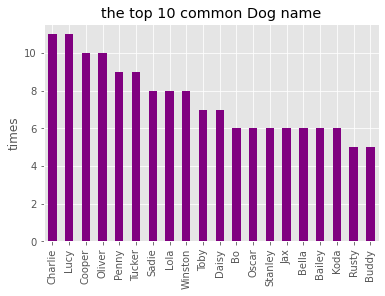

In [87]:
topDogsName = twitter_archive_enhanced_clean.name_of_the_dog.value_counts().nlargest(20)
topDogsName.plot(kind = 'bar', color = 'purple', title = 'the top 10 common Dog name',ylabel ='times');

### Top beloved dogs type (doggo, pupper, puppo or floofer)

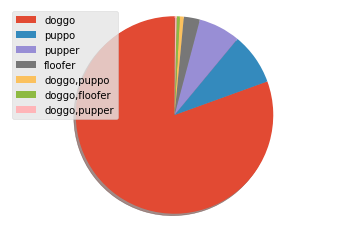

In [90]:
labels = twitter_archive_enhanced_clean.stage.unique().tolist()[1:]
sizes = twitter_archive_enhanced_clean.groupby(['stage']).favorite_count.sum().sort_values(ascending=False).tolist()
fig1, ax1 = plt.subplots()
ax1.pie(sizes,shadow=True, startangle=90)

plt.legend(labels)
ax1.axis('equal')

plt.show()

### Bar Plots

* likes and retweets by dog
* ratings by dog 

<AxesSubplot:title={'center':'overall_rating'}, xlabel='p1'>

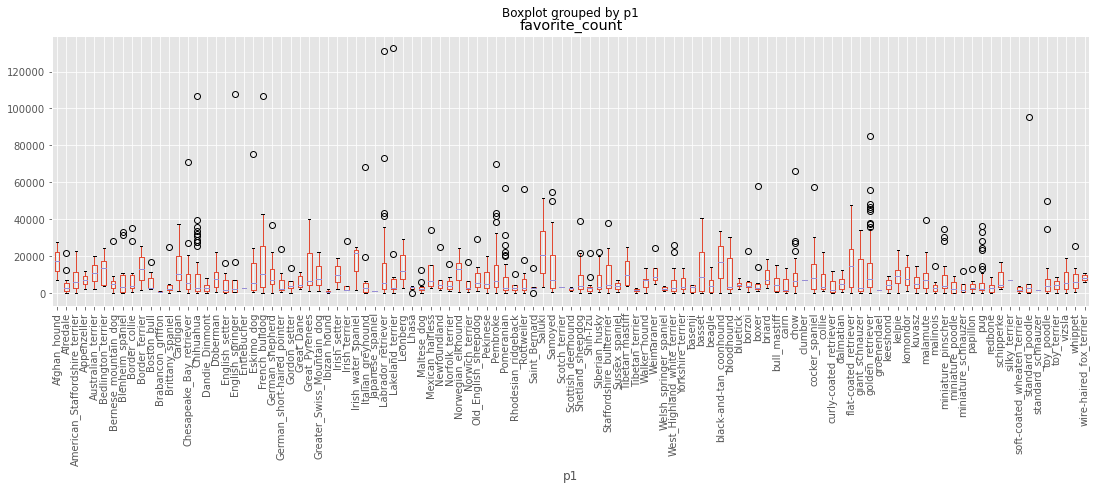

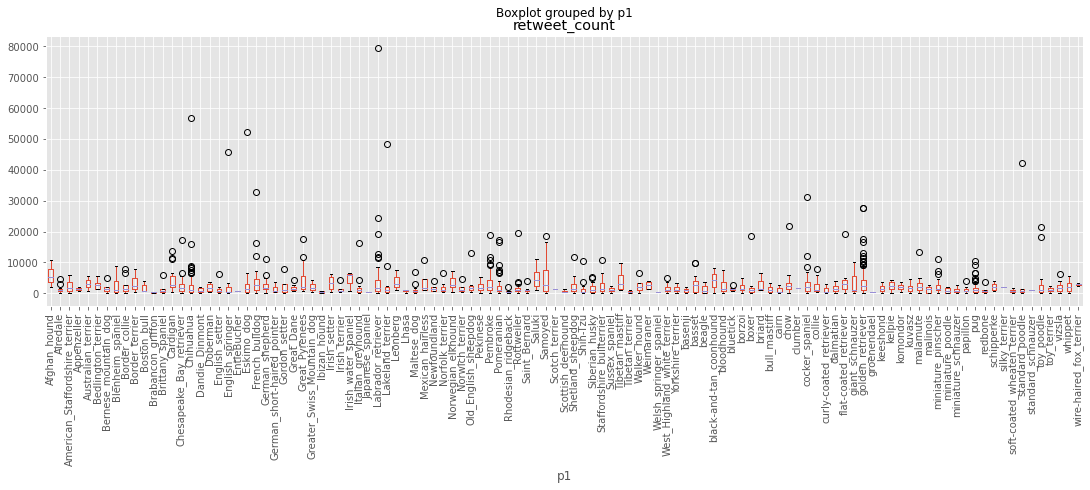

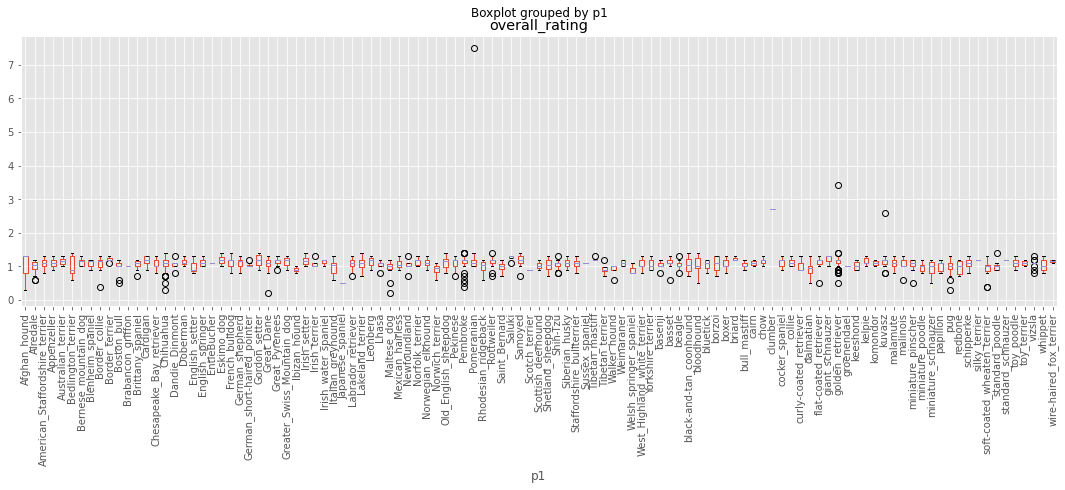

In [32]:
archive_clean[archive_clean.p1_dog==True].boxplot('favorite_count', 'p1', figsize=(18,  5), rot=90)

archive_clean[archive_clean.p1_dog==True].boxplot('retweet_count', 'p1', figsize=(18,  5), rot=90)


### Scatterplots
* likes and retweets by dog rating

<AxesSubplot:xlabel='overall_rating', ylabel='retweet_count'>

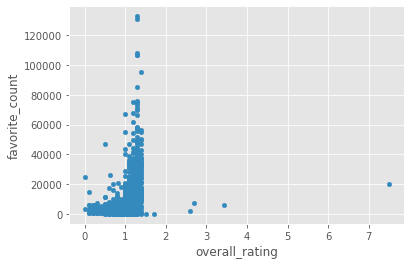

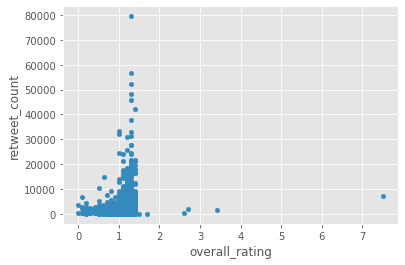

In [33]:
archive_clean[archive_clean.overall_rating<10].plot.scatter(x="overall_rating", y="favorite_count")

archive_clean[archive_clean.overall_rating<10].plot.scatter(x="overall_rating", y="retweet_count")

### the higher the rating, the more retweets and favorites, although this may be confounded by time

### Favorites, Retweets, and Ratings by Dog Breed

<Figure size 432x288 with 0 Axes>

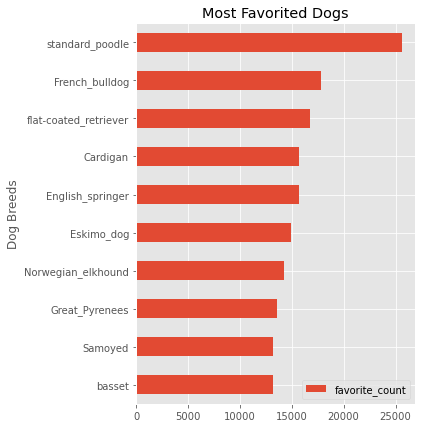

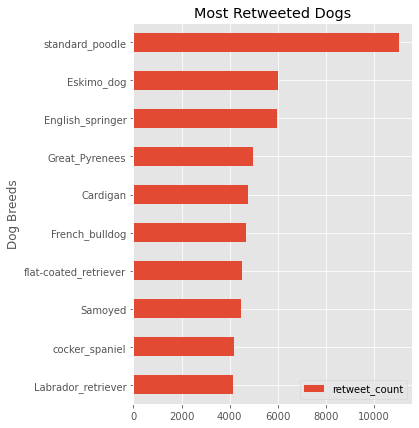

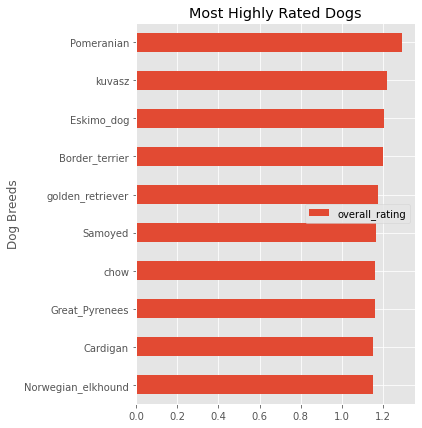

In [36]:
plt.clf()

# see which dog breeds were mentioned more than 5 times.
multiple_posts = archive_clean[archive_clean.p1_dog==True].groupby('p1')['tweet_id'].count()
multiple_posts = list(multiple_posts[multiple_posts>5].reset_index().p1)

# filter out outlier high ratings, non-dogs, very low picture confience, and dog breeds infrequently mentioned
dog_breed = archive_clean[(archive_clean.p1_dog==True) & 
              (archive_clean.overall_rating<10) &
              (archive_clean.p1.isin(multiple_posts)) &
              (archive_clean.p1_conf>0.3)].groupby('p1')["favorite_count"].mean().reset_index().sort_values('favorite_count', ascending=True).set_index('p1')
fig = dog_breed.tail(10).head(10).plot.barh(figsize=(5,7))
fig.set_ylabel("Dog Breeds")
fig.set_title("Most Favorited Dogs")
#plt.savefig('plots/favorited_dogs.png', bbox_inches='tight')

dog_breed = archive_clean[(archive_clean.p1_dog==True) & 
              (archive_clean.overall_rating<10) &
              (archive_clean.p1.isin(multiple_posts)) &
              (archive_clean.p1_conf>0.3)].groupby('p1')["retweet_count"].mean().reset_index().sort_values('retweet_count', ascending=True).set_index('p1')
fig = dog_breed.tail(10).plot.barh(figsize=(5,7))
fig.set_ylabel("Dog Breeds")
fig.set_title("Most Retweeted Dogs")
#plt.savefig('plots/retweeted_dogs.png', bbox_inches='tight')